<b style="font-size:24px;">Introduction</b>

As an analyst for Zuber, a new ride-sharing company that's launched in Chicago. 
We want to understand passenger preferences and the impact of external factors on rides.
We'll  test a hypothesis about the impact of weather on ride frequency.

<b style="font-size:24px;">Step 4. Exploratory data analysis (Python)</b>

In [15]:
#import python libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import levene

In [17]:
# upload taxi company and taxi trip files
try:
    taxi_company = pd.read_csv('/datasets/project_sql_result_01.csv')
    taxi_trip = pd.read_csv('/datasets/project_sql_result_04.csv')
    # load weather csv file
    weather = pd.read_csv('/datasets/project_sql_result_07.csv')
except:
    taxi_company = pd.read_csv('project_sql_result_01.csv')
    taxi_trip = pd.read_csv('project_sql_result_04.csv')
    weather = pd.read_csv('project_sql_result_07.csv')

In [18]:
# View first 5 rows
taxi_company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [19]:
# View details of taxi companies
taxi_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [20]:
# view first 5 rows of taxi trips
taxi_trip.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [21]:
# View details of taxi trips
taxi_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [22]:
# check for duplicates
taxi_trip.duplicated().sum()

0

In [23]:
# check for duplicates
taxi_company.duplicated().sum()

0

In [24]:
# slice top 10 dropoff locations by average trips
dropoff = taxi_trip.nlargest(10,'average_trips')

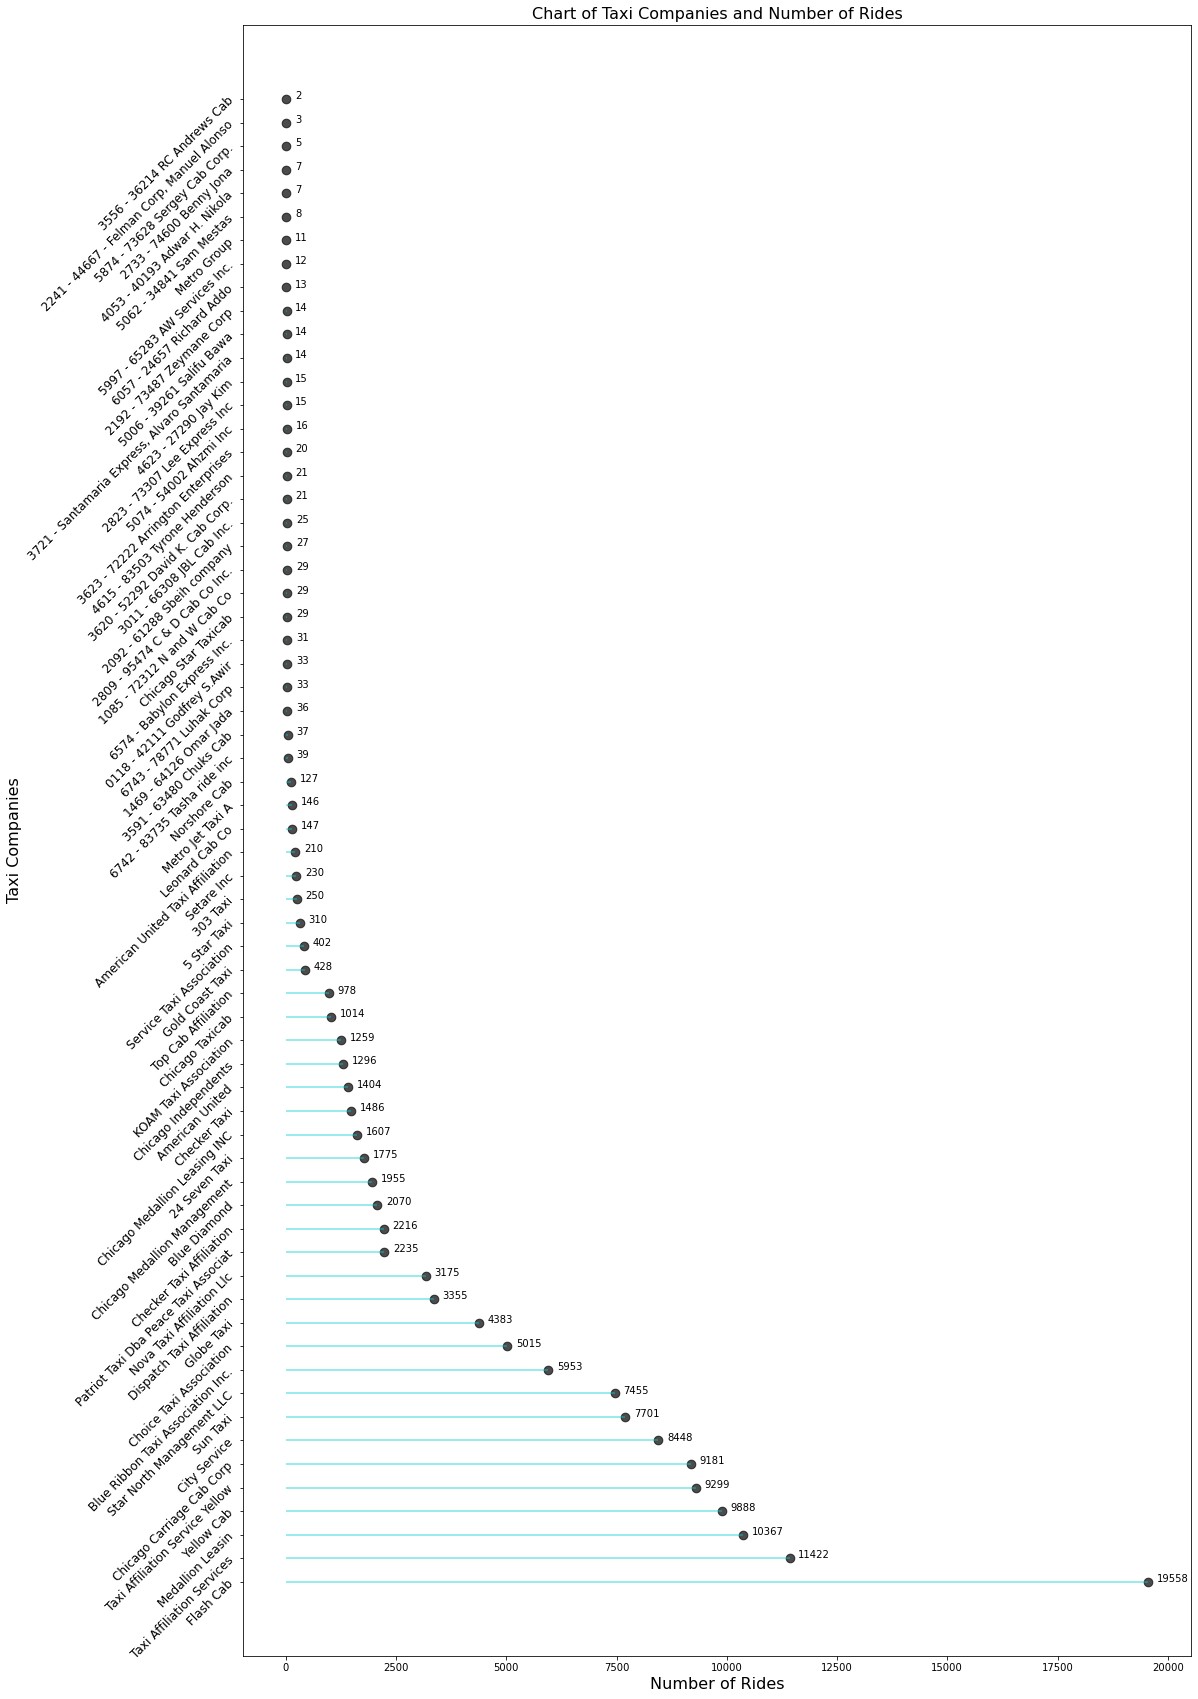

In [25]:
# draw a histogram between taxi companies and trips amount
fig,ax= plt.subplots(figsize=(17,30))
ax.hlines(y=taxi_company.company_name, xmax=taxi_company.trips_amount, xmin=0,color= 'darkturquoise',alpha=0.4,linewidth=2)
#ax.vlines(x =taxi_company.trips_amount,ymin=0,ymax=df.name,color= 'darkturquoise',alpha=0.7,linewidth=2)
ax.scatter(x=taxi_company.trips_amount, y=taxi_company.company_name, s=75, color='black',alpha=0.7)

# set labels and title for the chart
ax.set_title('Chart of Taxi Companies and Number of Rides',fontdict={'size':16})
ax.set_xlabel('Number of Rides',fontdict={'size':16})
ax.set_ylabel('Taxi Companies',fontdict={'size':16})
ax.set_yticks(taxi_company.company_name)
ax.set_yticklabels(taxi_company.company_name, rotation=45,fontdict={'horizontalalignment':'right','size':12})

# add the trip amount of taxi's in each taxi company
for row in taxi_company.itertuples():
    ax.text(row.trips_amount + 200,row.company_name, s = round(row.trips_amount,2))
plt.show()

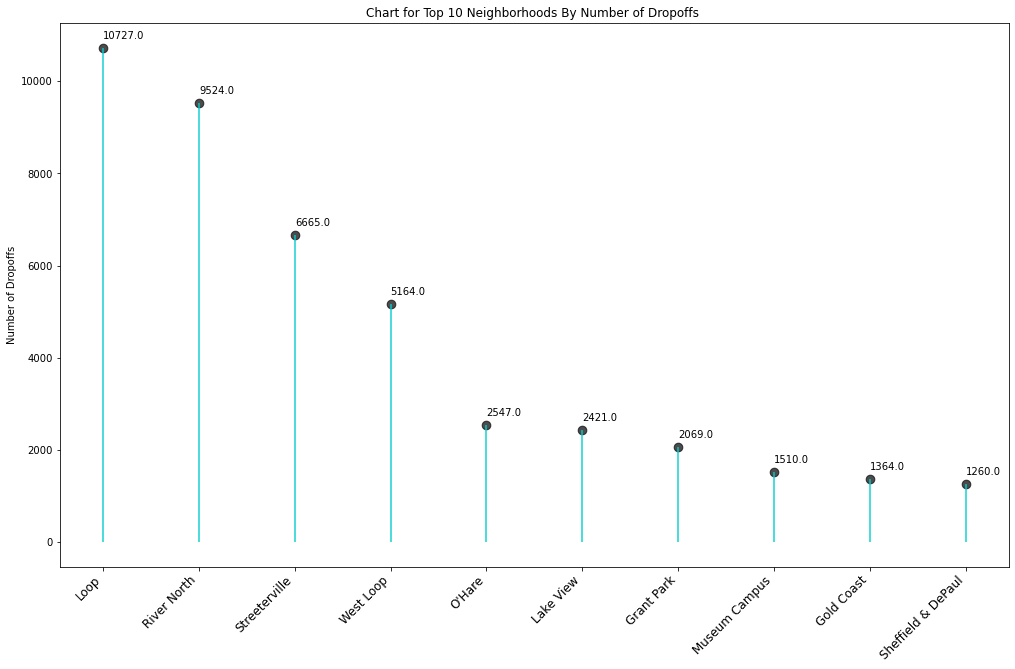

In [26]:
# draw a histogram between drop off locations and average trips
fig,ax= plt.subplots(figsize=(17,10))
ax.vlines(x =dropoff.dropoff_location_name,ymin=0,ymax=dropoff.average_trips,color= 'darkturquoise',alpha=0.7,linewidth=2)
ax.scatter(x=dropoff.dropoff_location_name, y=dropoff.average_trips, s=75, color='black',alpha=0.7)

# set labels and title for the chart
ax.set_title('Chart for Top 10 Neighborhoods By Number of Dropoffs ',fontdict={'size':12})
ax.set_ylabel('Number of Dropoffs')
ax.set_xticks(dropoff.dropoff_location_name)
ax.set_xticklabels(dropoff.dropoff_location_name, rotation=45,fontdict={'horizontalalignment':'right','size':12})

# add the average trips on each drop off locations
for row in dropoff.itertuples():
    ax.text(row.dropoff_location_name,row.average_trips + 200, s = round(row.average_trips,0))
plt.show()

<b style="font-size:20px;">Conclusion</b>

We found out that various taxi companies and their respective number of trips dataset have
no missing values.It comprises of 2 features and 64 entries. 
Also the dropoff location and their respective average trips dataset have 94 
entries with 2 features having no null or missing values.
From the histogram of taxi companies and their respective number of rides, "Flash cab" 
taxi company had the highest average number of rides from one location to the other.
An average of 19558 number of rides was made in 2017 followed by "Taxi affiliation services" 
with an average of 11422.
Whiles "356 - 36214 RC Andrews cab" had the least average of taxi rides of 2.
We can deduce that "Flash cab" had high number of taxi rides on most days as compared 
to "356 - 36214 RC Andrews cab".
In addition to this, we can see that Loop is the location having the highest number of drop offs 
with an average of 10727.This can be infered that Loop area either have high settlement or there 
are social aminities that draws customers to the "Loop" area.

<b style="font-size:24px;">Step 5. Testing hypotheses (Python)</b>

In [27]:
# list first five days of taxi trip durations and its corresponding weather conditions 
weather.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [28]:
# give details of weather data set 
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [29]:
# change start_ts feature data type from object to datetime
weather['start_ts'] = pd.to_datetime(weather['start_ts'], format = '%Y-%m-%d %H:%M:%S')

In [30]:
# change duration_seconds feature to integer
weather['duration_seconds'] = weather['duration_seconds'].astype('int64')

In [31]:
# create day of the week feature
weather['day_of_week'] = weather['start_ts'].dt.weekday

In [32]:
weather.head()

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410,5
1,2017-11-25 14:00:00,Good,1920,5
2,2017-11-25 12:00:00,Good,1543,5
3,2017-11-04 10:00:00,Good,2512,5
4,2017-11-11 07:00:00,Good,1440,5


 <b style="font-size:16px;">The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays</b>

In [33]:
# shapiro's test to check hypothesis of normality
def normality_test(data):
    alpha = 0.05 # critical statistical significance level
             # If the p-value is less than or equal to alpha, we reject the hypothesis of normality
    stat, p = st.shapiro(data)
    print('P-value: ', p)
    
    if(p < alpha):
        print('we reject the normality hypothesis')
    else:
        print('we fail to reject the normality hypothesis')

 <b style="font-size:13px;">Null and Alternate Hypothesis</b>

null hypothesis
 <br>
 $H_{0}$ :$\mu$ = $\mu_{0}$ (Average duration of rides from Loop to O'Hare International Airport are equal on rainy and non rainy saturdays)
 
 <br>
  Alternate hypothesis
  <br>
  $H_{1}$ :$\mu_{}$ $\neq$ $\mu_{0}$ (Average duration of rides from Loop to O'Hare International Airport are not equal on rainy and non rainy saturdays  )

In [34]:
rainy = weather.query('weather_conditions == "Bad" & day_of_week== 5')

In [35]:
non_rainy = weather.query('weather_conditions != "Bad" & day_of_week== 5')

<b style="font-size:16px;">Test for normality for rainy and non-rainy saturdays  samples</b>

In [36]:
# Test for normality of rainy and non - rainy saturdays 
normality_test(rainy.duration_seconds)

P-value:  0.0036114114336669445
we reject the normality hypothesis


<b style="font-size:16px;">Test for normality for non - rainy  saturdays  samples</b>

In [37]:
# Test for normality of rainy and non - rainy saturdays 
normality_test(non_rainy.duration_seconds)

P-value:  1.5531143989089215e-22
we reject the normality hypothesis


<b style="font-size:16px;">Test whether rainy or non-rainy saturday samples have equal variance or not</b>

In [38]:
stat, p = levene(rainy.duration_seconds, non_rainy.duration_seconds)
p

0.5332038671974493

A p-value 0.53 is large enough to suggests that the populations have equal variance.

In [39]:
# Function to test for null and alternate hypothesis
def hypothesis_test(sample1,sample2):
    alpha = 0.05 # critical statistical significance level
             # If the p-value is less than alpha, we reject the hypothesis
    results = st.ttest_ind(sample1,sample2,equal_var=True)
    print('P-value: ', results.pvalue)
    
    if(results.pvalue < alpha):
        print('we reject the null hypothesis')
    else:
        print('we fail to reject the null hypothesis')
    

In [40]:
hypothesis_test(rainy['duration_seconds'],non_rainy['duration_seconds'])

P-value:  6.517970327099473e-12
we reject the null hypothesis


We reject the null hypothesis. From the solution it can be determined that a pvalue of 6.517970327099473e-12 was obtained which is way less than the alpha value of 0.05. Hence we can say we have a statistically significant results. 
When we say pvalue <0.05 we are declaring that the probability of getting the results we obtained is less  than 0.05(5%). This value also informs us that the two samples are significantly different from the population
or belonging to some other distribution.
This says that the likeliness of using equal time duration on average to travel from Loop to O'Hare International Airport on Good weather compared to Bad weather a rare event or unlikely
with respect  to the population distribution.

<b style="font-size:24px;">General Conclusion</b>

T begin with ,We found out that various taxi companies and their respective number of trips dataset have no missing values.It comprises of 2 features and 64 entries. Also the dropoff location and their respective average trips dataset have 94 entries with 2 features having no null or missing values. From the histogram of taxi companies and their respective number of rides, "Flash cab" taxi company had the highest average number of rides from one location to the other. An average of 19558 number of rides was made in 2017 followed by "Taxi affiliation services" with an average of 11422. Whiles
"356 - 36214 RC Andrews cab" had the least average of taxi rides of 2. We can deduce that "Flash cab" had high number of taxi rides on most days as compared to "356 - 36214 RC Andrews cab".

In addition to this, we can see that Loop is the location having the highest number of drop offs with an average of 10727.This can be infered that Loop area either have high settlement or there are social aminities that draws customers to the "Loop" area.

We reject the null hypothesis. From the solution it can be determined that a pvalue of 6.517970327099473e-12 was obtained which is way less than the alpha value of 0.05. 
Hence we can say we have a statistically significant results. When we say pvalue <0.05 we are declaring that the probability of getting the results we obtained is less than 0.05(5%). 
This value also informs us that the two samples are significantly different from the 
population or belonging to some other distribution. This says that the likeliness of using 
equal time duration on average to travel from Loop to O'Hare International Airport on Good
weather compared to Bad weather a rare event or unlikely with respect to the population distribution.

In conclusion we can unfer from the hypothesis that external forces such as rain bad weather conditions affect the frequency of rides.